# Music_Mental_Health _Analysis

## Step 1: Import necessary libraries

In [2]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the dataset


In [2]:
df = pd.read_csv('mxmh_survey_results.csv')

## Step 3: Explore the dataset

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

First 5 rows of the dataset:
            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0             


## Step 4: Clean column names

In [4]:
# Before cleaning: print total number of rows
print("Rows before cleaning:", len(df))

# Drop rows with missing values in key columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# After cleaning: print total number of rows
print("Rows after cleaning:", len(df))

Rows before cleaning: 736
Rows after cleaning: 736


## Step 5: Handle missing values

In [5]:
df = df.dropna(subset=['primary_streaming_service', 'fav_genre', 'anxiety', 'depression'])

## Step 6: Check value counts

In [6]:
print("\nTop 5 genres by count:")
print(df['fav_genre'].value_counts().head())

print("\nAnxiety score distribution:")
print(df['anxiety'].value_counts().sort_index())


Top 5 genres by count:
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
Name: fav_genre, dtype: int64

Anxiety score distribution:
0.0      35
1.0      29
2.0      44
3.0      69
4.0      56
5.0      59
6.0      83
7.0     122
7.5       1
8.0     115
9.0      55
10.0     67
Name: anxiety, dtype: int64


## Step 7: Group by genre to find average anxiety level

In [7]:
 genre_anxiety = df.groupby('fav_genre')['anxiety'].mean().sort_values()

## Step 8: Visualize the result

/tmp/ipykernel_283015/4170652683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_anxiety.values, y=genre_anxiety.index, palette='coolwarm')


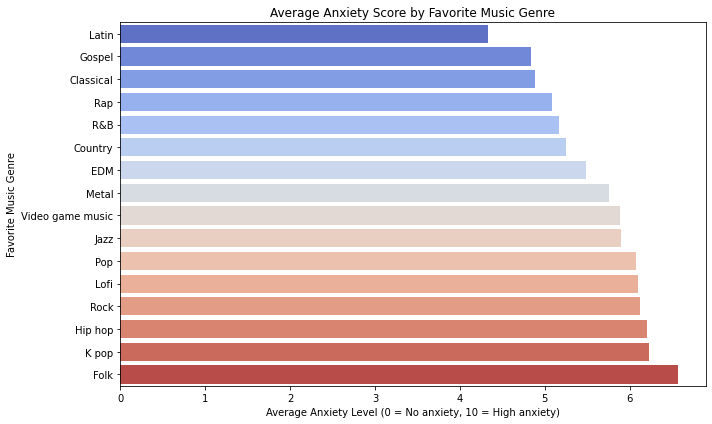

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_anxiety.values, y=genre_anxiety.index, palette='coolwarm')
plt.title("Average Anxiety Score by Music Genre")
plt.xlabel("Average Anxiety Level (0 = No anxiety, 10 = High anxiety)")
plt.ylabel("Music Genre")
plt.tight_layout()
plt.show()

## Step 9: Group by genre and calculate average depression score

In [9]:
# Group by genre and calculate average depression score
genre_depression = df.groupby('fav_genre')['depression'].mean().sort_values()


## Step 10: Visualize the results

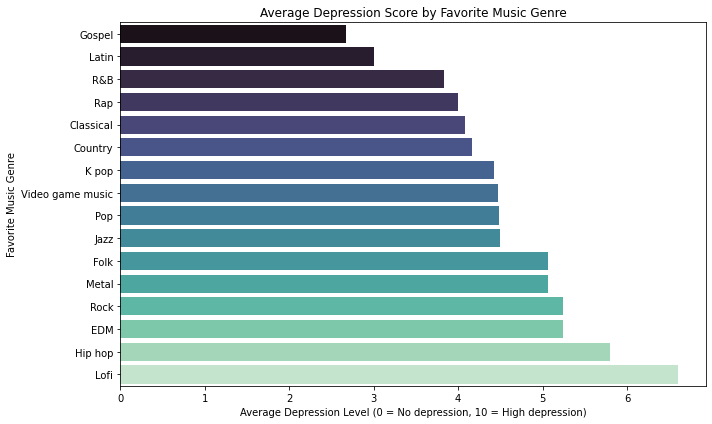

In [10]:
# Plot: Average depression score by genre
plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_depression.values,
    y=genre_depression.index,
    hue=genre_depression.index,
    palette='mako',  # You can try 'coolwarm', 'rocket', 'cubehelix', etc.
    dodge=False
)
plt.legend([],[], frameon=False)  # Hide legend
plt.title("Average Depression Score by Music Genre")
plt.xlabel("Average Depression Level (0 = No depression, 10 = High depression)")
plt.ylabel("Music Genre")
plt.tight_layout()
plt.show()
